## Imorting Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter('ignore')

## APPLE DATASET

In [81]:
# Downloading dataset and converting into csv file
aapl = pdr.DataReader('AAPL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
aapl.to_csv('Apple_stock.csv', sep=',')
apple = pd.read_csv('Apple_stock.csv', index_col='Date',parse_dates=True)
df = pd.read_csv('Apple_stock.csv')
df1=df
df2 =pd.read_csv('Apple_stock.csv',index_col='Date',parse_dates=True)

In [3]:
df.head() #head of the dataset

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-01,24.155001,23.702499,23.725000,24.032499,194044000.0,21.657644
1,2014-08-04,24.145000,23.792500,24.092501,23.897499,159832000.0,21.535982
2,2014-08-05,23.920000,23.590000,23.840000,23.780001,223732000.0,21.430096
3,2014-08-06,23.870001,23.677500,23.687500,23.740000,154232000.0,21.394049
4,2014-08-07,23.987499,23.525000,23.732500,23.620001,186844000.0,21.391787


In [4]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,27.992016,27.478374,27.743353,27.738748,1.891853e+08,25.586068
std,2.712822,2.695806,2.718831,2.700132,8.425158e+07,2.418740
min,22.917500,22.367500,22.500000,22.584999,4.590360e+07,21.134403
25%,25.547501,25.125000,25.327499,25.330000,1.311576e+08,23.305397
50%,27.969999,27.352501,27.657499,27.610001,1.733648e+08,25.591351
75%,29.807501,29.250000,29.497499,29.570000,2.243016e+08,27.354954
max,33.634998,32.849998,33.615002,33.250000,7.593852e+08,30.384638


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       589 non-null    object 
 1   High       589 non-null    float64
 2   Low        589 non-null    float64
 3   Open       589 non-null    float64
 4   Close      589 non-null    float64
 5   Volume     589 non-null    float64
 6   Adj Close  589 non-null    float64
dtypes: float64(6), object(1)
memory usage: 32.3+ KB


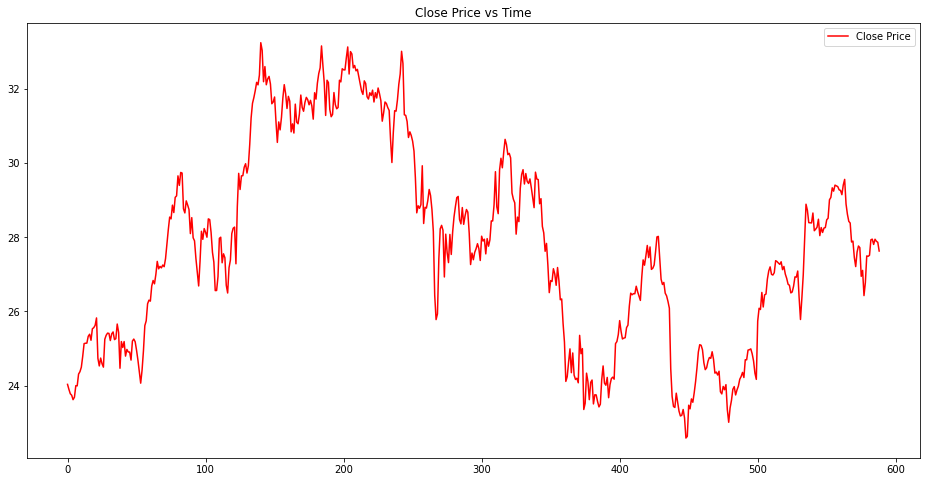

In [6]:
# Data Visualization
plt.figure(figsize=(16,8),)
plt.plot(df['Close'], label='Close Price',color='r')
plt.legend()
plt.title('Close Price vs Time');

## **Histogram**

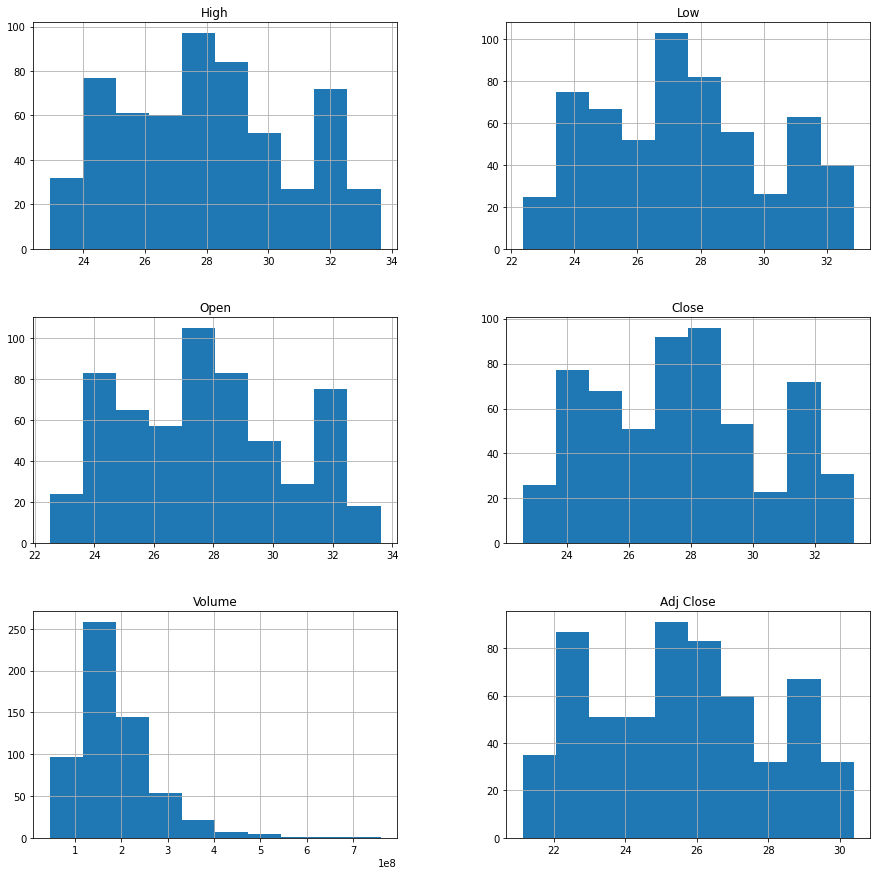

In [84]:
df.hist(figsize=(15,15));

## **Scatter Plot**

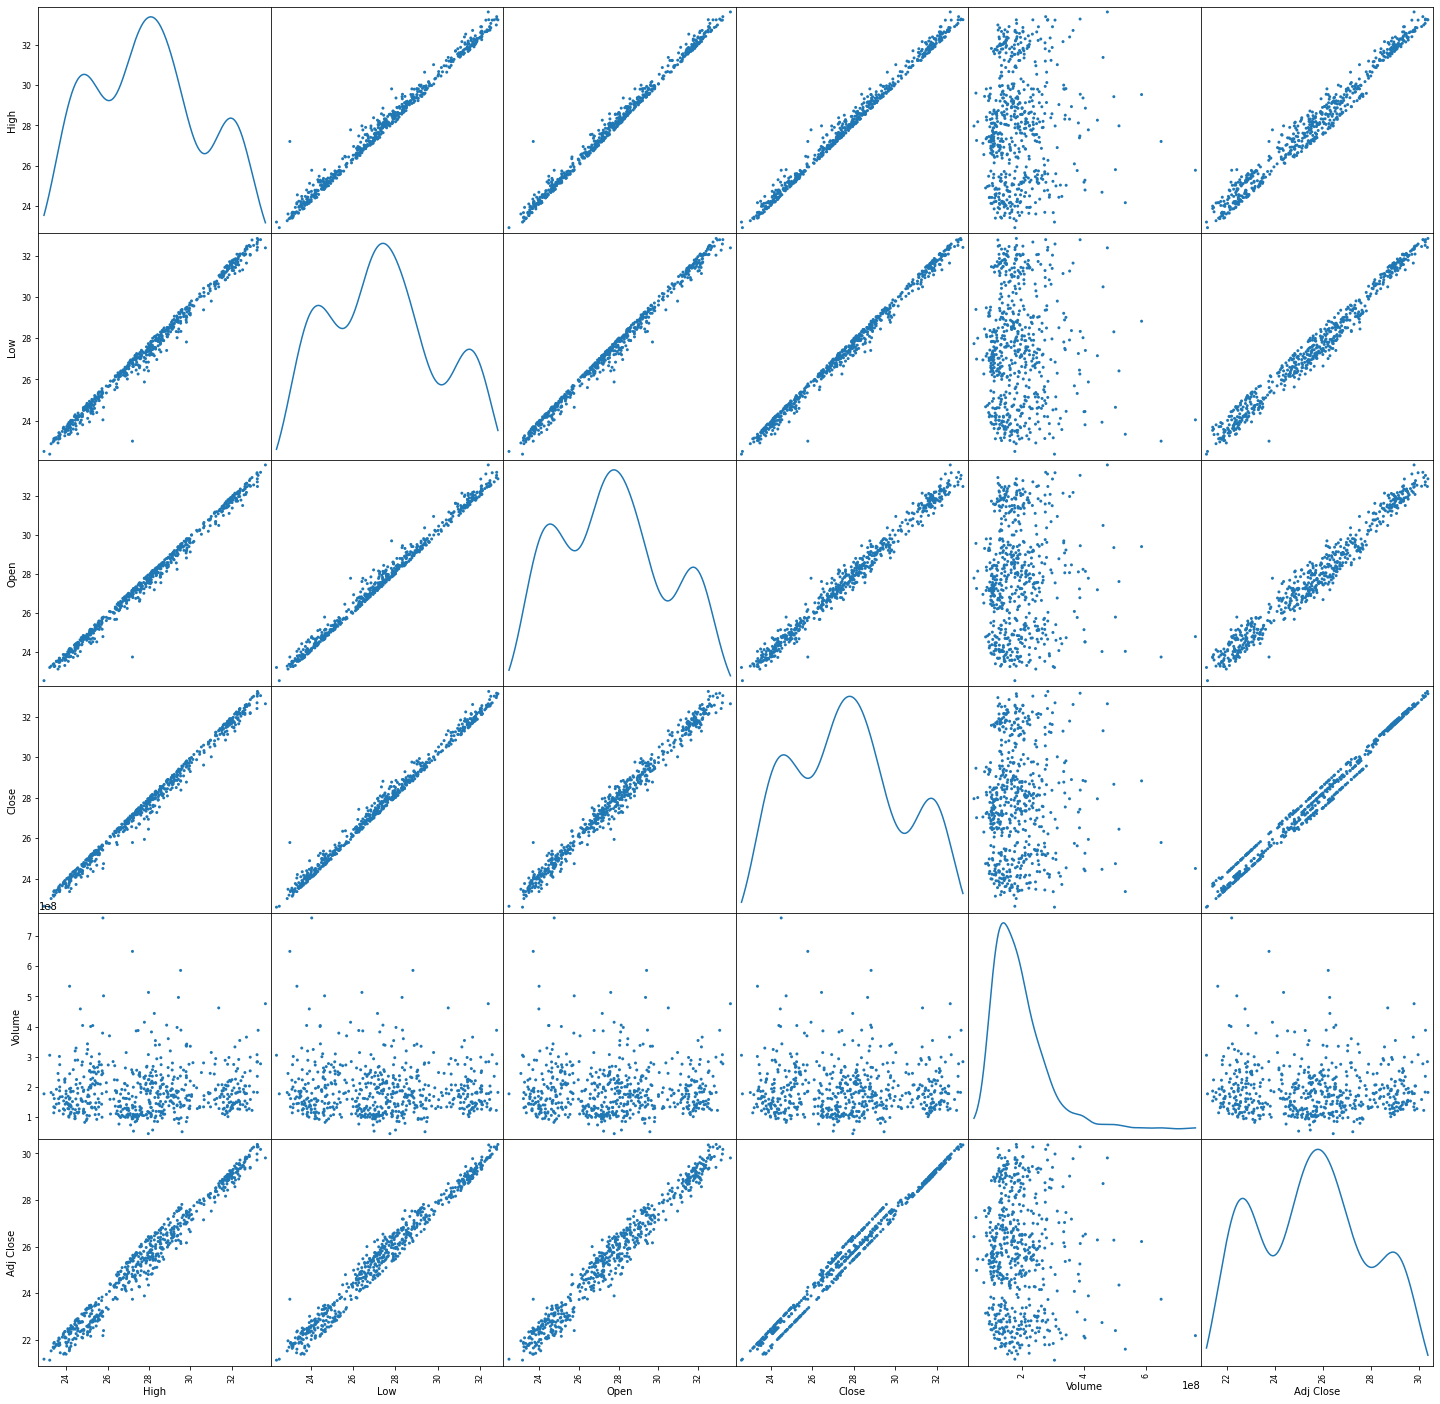

In [8]:
pd.plotting.scatter_matrix(df, alpha=1.0, figsize=(25, 25), diagonal='kde')
plt.show()

## **Heat Map**

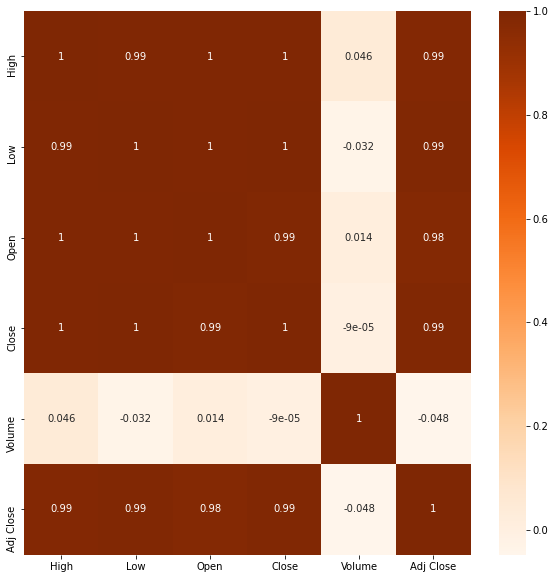

In [9]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Oranges',annot=True) 

## **Seaborn's clustermap**

Seaborn's clustermap to cluster the correlations together:

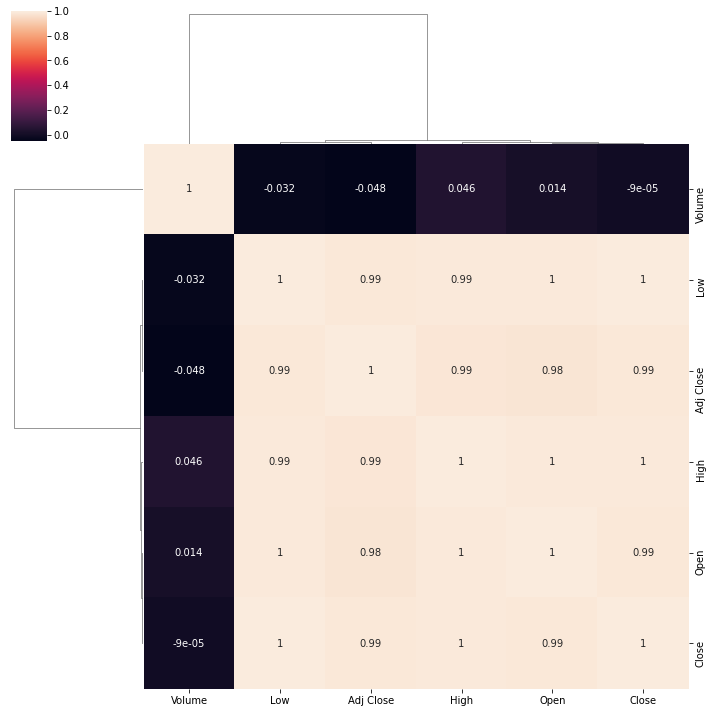

In [10]:
sns.clustermap(df.corr(),annot=True);

## ADF and KPSS Test


**To check the stationarity of the Data Set**

**ADF TEST**

The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

> **Null Hypothesis:** The series has a unit root (value of a =1)

> **Alternate Hypothesis:** The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary

**Test for stationarity:** If the test statistic is less than the critical value, we can reject the null hypothesis. When the test statistic is greater than the critical value, we fail to reject the null hypothesis.

In [11]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
  #Perform Dickey-Fuller test:
  timeseries = df[atr].dropna()
  print ('Results of Dickey-Fuller Test for ',atr,'\n')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.170605
p-value                          0.217087
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


Since the test statistic is less than the critical value, we can reject the null hypothesis.

The dataset is non Stationary.

**KPSS TEST**

KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.

The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series.

> **Null Hypothesis:** The process is trend stationary.
    
> **Alternate Hypothesis:** The series has a unit root (series is not stationary).
    
**Test for stationarity** If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary).


In [12]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(atr):
  timeseries = df[atr].dropna()
  print ('Results of KPSS Test for ',atr)
  kpsstest = kpss(timeseries, regression='c')
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print (kpss_output)
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            0.655743
p-value                   0.017569
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary)

From both ADF and KPSS Test we can conclude that the given series is Non-Stationary.

## ACF and PACF PLOT

**ACF PLOT**

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

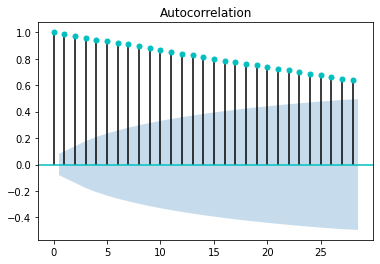

In [14]:
plot_acf(df['Close'],color='c')
plt.show()

**PACF PLOT**

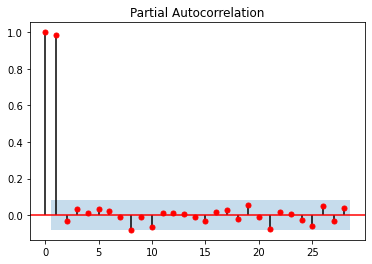

In [15]:
plot_pacf(df['Close'],color='r')
plt.show()

From the above plots, since more than 5% of the peak is more than critical
value i.e above the shaded region,

Hence the dataset is non-stationary.

## Making Dataset Stationary

Now that we are familiar with the concept of stationarity and its different types, we can finally move on to actually making our series stationary. Always keep in mind that in order to use time series forecasting models, it is necessary to convert any non-stationary series to a stationary series first.

**Differencing**
In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

$$\Large y^{'}_{t} = y_t - y_{t-1} $$

where $y_t$ is the value at a time t

**Seasonal Differencing**
In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. Mathematically it can be written as:

$$\Large y^{'}_{t} = y_t - y_{t-n} $$

**Transformation**
Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on our dataset.

In [16]:
# Differencing the data for 1 period
#df['diff'] = df['Close'].diff(periods=1)

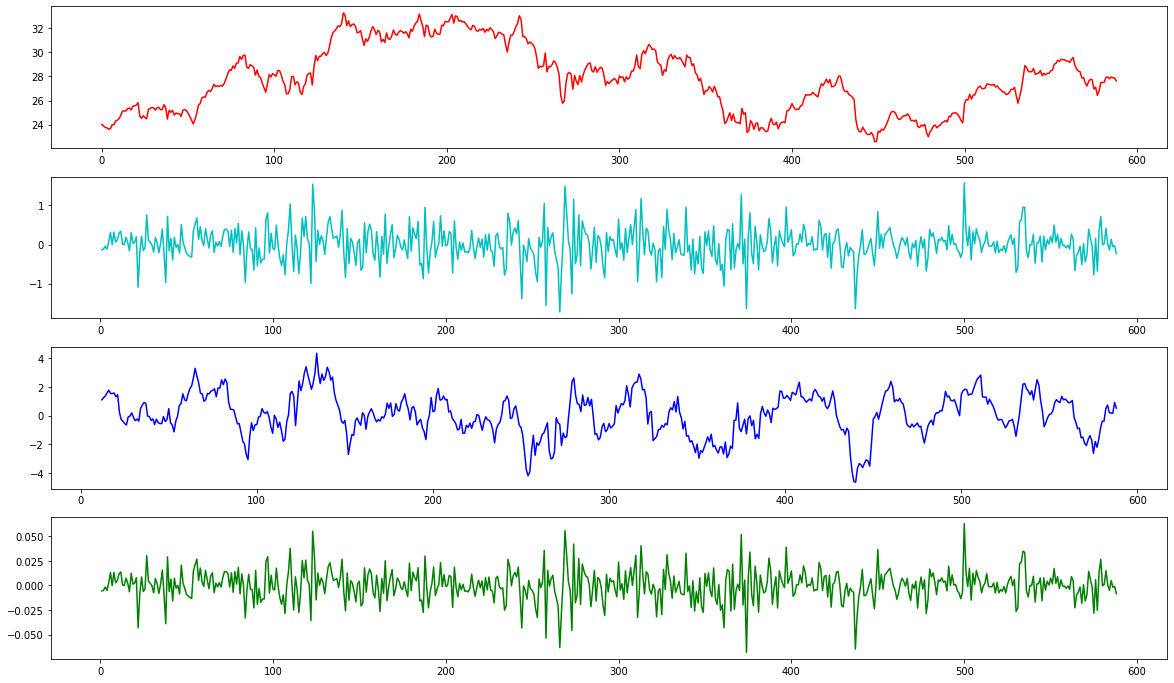

In [79]:
# Differencing
df['diff'] = df['Close'].diff(periods=1)

# Seasonal Differencing
df['seas_diff'] = df['Close'].diff(periods=12)

# Transformation (here we use log transformation)
df_log = np.log(df['Close'])
df['log_diff'] = df_log.diff(periods=1)

plt.subplot(4, 1, 1)
df['Close'].plot(figsize=(20,12),color='red')
plt.subplot(4, 1, 2)
df['diff'].plot(color='c')
plt.subplot(4, 1, 3)
df['seas_diff'].plot(color='blue')
plt.subplot(4, 1, 4)
df['log_diff'].plot(color='g')
plt.show()

The above plot clearly show that the mean of the given dataset is close to zero.

We can say that the differenced data is stationary. 

But for better conclusion we will apply ADF and KPSS Test.

###ADF TEST

In [19]:
# ADF test for the new differnecing dataset
adf_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                  -4.132634
p-value                          0.000855
#Lags Used                      18.000000
Number of Observations Used    561.000000
Critical Value (1%)             -3.442060
Critical Value (5%)             -2.866706
Critical Value (10%)            -2.569521
dtype: float64


Since the test statistic is greater than the critical value, we can not reject the null hypothesis.

Hence differenced data is stationary.

###KPSS TEST

In [20]:
# KPSS test for the new differnecing dataset
kpss_test('diff')

Results of KPSS Test for  diff
Test Statistic            0.155673
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


Since the test statistic is less than the critical value, we can not reject the null hypothesis .

Hence differenced series is stationary.

Both ADF and KPSS test conclude us that the difference dataset is Stationary.

###ACF PLOT

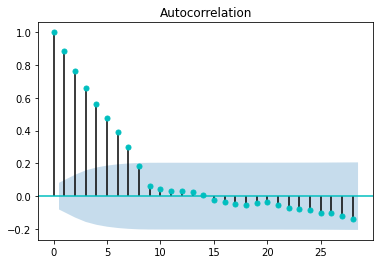

In [21]:
plot_acf(df['diff'].dropna(), color='c')
plt.show()

###PACF PLOT

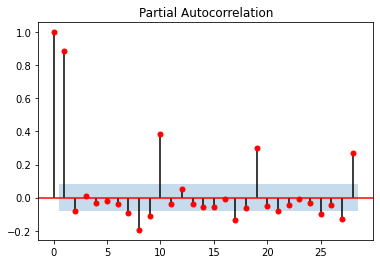

In [22]:
plot_pacf(df['diff'].dropna(), color='r')
plt.show()

From the above plots(ACF and PACF), since only less than 5% of the peak is more than critical
value i.e above the shaded region,

Hence the dataset is Stationary.

## EXPONENTIAL SMOOTHING MODEL

### Simple Exponential Smoothing

In [23]:
df3=df['Close']
df3 = pd.DataFrame(df3)

In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 2/(span+1)
df3['EWMA12'] = df3['Close'].ewm(alpha=alpha,adjust=False).mean()
df3['SES12']=SimpleExpSmoothing(df3['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df3.head()

,Close,EWMA12,SES12
0,24.032499,24.032499,24.032499
1,23.897499,24.011730,24.011730
2,23.780001,23.976079,23.976079
3,23.740000,23.939759,23.939759
4,23.620001,23.890566,23.890566


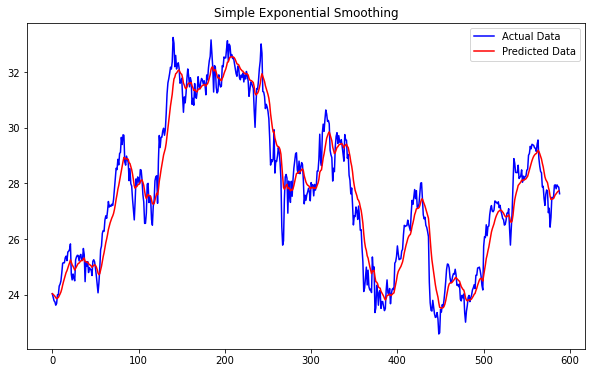

In [25]:
plt.figure(figsize=(10,6))
plt.plot(df3['Close'],label='Actual Data',color='b')
plt.plot(df3['SES12'].to_list(),label='Predicted Data',color='red')
plt.legend()
plt.title('Simple Exponential Smoothing')
plt.show()

###Double Exponential Smoothing

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df3['DESadd12'] = ExponentialSmoothing(df3['Close'], trend='add').fit().fittedvalues.shift(-1)
df3.head()

,Close,EWMA12,SES12,DESadd12
0,24.032499,24.032499,24.032499,24.038619
1,23.897499,24.011730,24.011730,23.903619
2,23.780001,23.976079,23.976079,23.786121
3,23.740000,23.939759,23.939759,23.746120
4,23.620001,23.890566,23.890566,23.626121


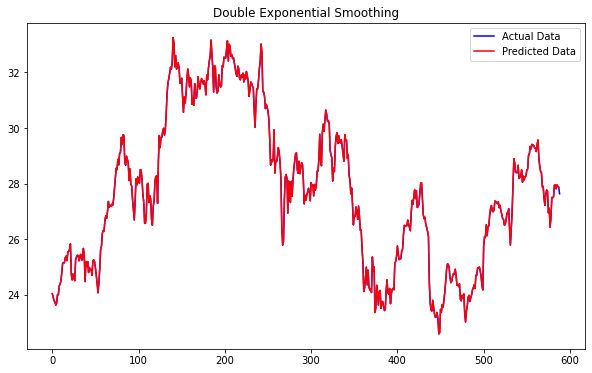

In [27]:
plt.figure(figsize=(10,6))
plt.plot(df3['Close'],label='Actual Data',color='b')
plt.plot(df3['DESadd12'].to_list(),label='Predicted Data',color='red')
plt.legend()
plt.title('Double Exponential Smoothing')
plt.show()

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.

Also Double Exponential Smoothing perfectly mimics the behaviour of Dataset

###Triple Exponential Smoothing

In [28]:
df3['TESadd12'] = ExponentialSmoothing(df3['Close'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df3.head()

,Close,EWMA12,SES12,DESadd12,TESadd12
0,24.032499,24.032499,24.032499,24.038619,24.032386
1,23.897499,24.011730,24.011730,23.903619,24.081337
2,23.780001,23.976079,23.976079,23.786121,23.850143
3,23.740000,23.939759,23.939759,23.746120,23.826969
4,23.620001,23.890566,23.890566,23.626121,23.795958


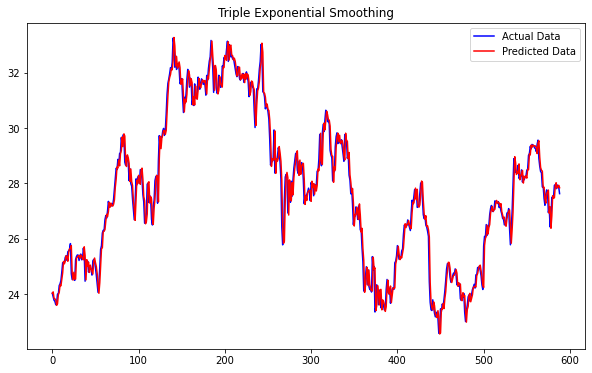

In [29]:
plt.figure(figsize=(10,6))
plt.plot(df3['Close'],label='Actual Data',color='b')
plt.plot(df3['TESadd12'].to_list(),label='Predicted Data',color='red')
plt.legend()
plt.title('Triple Exponential Smoothing')
plt.show()

Triple Exponential Smoothing perfectly mimics the behaviour of Dataset

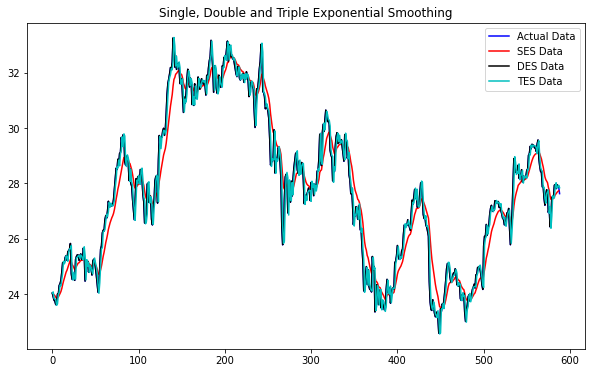

In [30]:
plt.figure(figsize=(10,6))
plt.plot(df3['Close'],label='Actual Data',color='b')
plt.plot(df3['SES12'].to_list(),label='SES Data',color='red')
plt.plot(df3['DESadd12'].to_list(),label='DES Data',color='k')
plt.plot(df3['TESadd12'].to_list(),label='TES Data',color='c')
plt.legend()
plt.title('Single, Double and Triple Exponential Smoothing')
plt.show()

## ARIMA MODEL

In [31]:
# Installing pmdarima package
!pip3 install pmdarima

In [32]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt

In [33]:
import pmdarima as pm
model = pm.auto_arima(df['Close'], start_p=1, start_q=1,test='adf',max_p=3, max_q=3,m=1,d=None,seasonal=False,start_P=0, D=0, trace=True,error_action='ignore',  suppress_warnings=True,stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=676.425, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=673.614, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=675.445, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=675.430, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=671.734, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.902 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  589
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -334.867
Date:                Fri, 07 May 2021   AIC                            671.734
Time:                        17:52:18   BIC                            676.111
Sample:                             0   HQIC                           673.439
                                - 589                                         
Co

In [34]:
# Train-Test split
close_data = df['Close'].dropna().to_numpy()
n = int(len(close_data)*0.7)
train, test = close_data[:n], close_data[n:]

In [35]:
# ARIMA MODEL Fitting
model_arima = ARIMA(close_data, order=(1, 1, 1))
model_arima_fit = model_arima.fit()

In [36]:
# Predicted data
y_pred = model_arima_fit.predict(typ='levels')

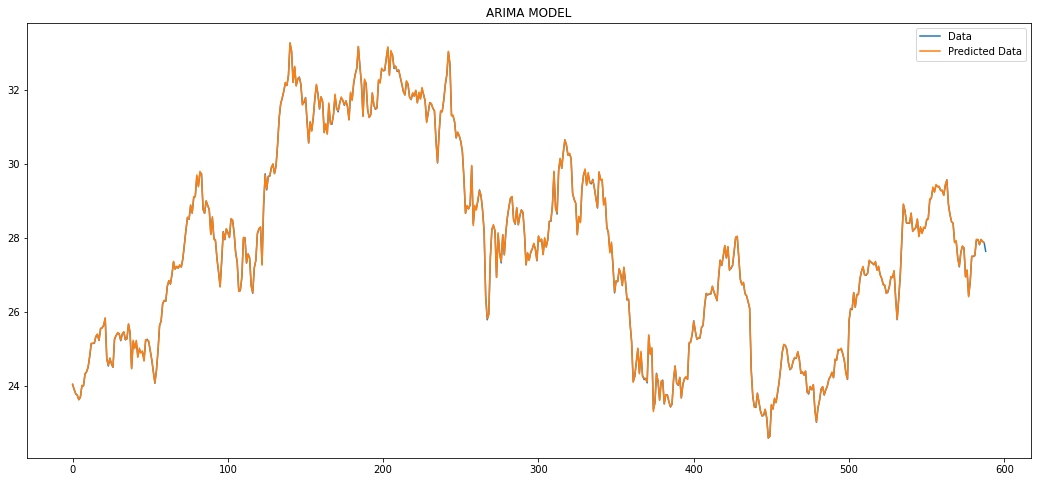

In [37]:
# Visualize ARIMA MODEL Results
plt.figure(figsize=(18,8))
plt.plot(close_data,label='Data')
plt.plot(y_pred,label='Predicted Data')
plt.title('ARIMA MODEL')
plt.legend()
plt.show()

In [38]:
# Calculating ROOT MEAN SQUARE ERROR
rmse = sqrt(mean_squared_error(close_data[1:,], y_pred))
print('RMSE Value: ',rmse)

RMSE Value:  0.4271774978894908


---

## PROPHET MODEL

In [39]:
from fbprophet import Prophet #importing prophet library

In [40]:
data_prophet = df.filter(['Date','Close'])
data_prophet.columns = ['ds','y']
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])

In [41]:
data_prophet

,ds,y
0,2014-08-01,24.032499
1,2014-08-04,23.897499
2,2014-08-05,23.780001
3,2014-08-06,23.740000
4,2014-08-07,23.620001
...,...,...
584,2016-11-23,27.807501
585,2016-11-25,27.947500
586,2016-11-28,27.892500
587,2016-11-29,27.865000


In [42]:
# Prophet model
aapl_model_prophet = Prophet(daily_seasonality = True) #daily seasonality
aapl_model_prophet.fit(data_prophet)

In [43]:
#Prediction for 45 days in future
future_prophet = aapl_model_prophet.make_future_dataframe(periods = 45)
prediction_prophet = aapl_model_prophet.predict(future_prophet)

In [44]:
prediction_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-08-01,23.857268,22.459577,24.852928,23.857268,23.857268,-0.170009,-0.170009,-0.170009,-0.251261,-0.251261,-0.251261,-0.028790,-0.028790,-0.028790,0.110042,0.110042,0.110042,0.0,0.0,0.0,23.687259
1,2014-08-04,23.920445,22.629867,24.947007,23.920445,23.920445,-0.028865,-0.028865,-0.028865,-0.251261,-0.251261,-0.251261,0.015071,0.015071,0.015071,0.207325,0.207325,0.207325,0.0,0.0,0.0,23.891580
2,2014-08-05,23.941504,22.792062,25.080650,23.941504,23.941504,-0.053738,-0.053738,-0.053738,-0.251261,-0.251261,-0.251261,-0.038453,-0.038453,-0.038453,0.235976,0.235976,0.235976,0.0,0.0,0.0,23.887767
3,2014-08-06,23.962563,22.878319,25.165736,23.962563,23.962563,0.006193,0.006193,0.006193,-0.251261,-0.251261,-0.251261,-0.004152,-0.004152,-0.004152,0.261606,0.261606,0.261606,0.0,0.0,0.0,23.968756
4,2014-08-07,23.983622,22.821170,25.150242,23.983622,23.983622,0.025839,0.025839,0.025839,-0.251261,-0.251261,-0.251261,-0.006490,-0.006490,-0.006490,0.283591,0.283591,0.283591,0.0,0.0,0.0,24.009462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,2017-01-10,28.290771,25.067789,27.589695,28.011254,28.575498,-1.941083,-1.941083,-1.941083,-0.251261,-0.251261,-0.251261,-0.038453,-0.038453,-0.038453,-1.651369,-1.651369,-1.651369,0.0,0.0,0.0,26.349689
630,2017-01-11,28.303875,25.170072,27.555431,28.013780,28.600873,-1.967225,-1.967225,-1.967225,-0.251261,-0.251261,-0.251261,-0.004152,-0.004152,-0.004152,-1.711812,-1.711812,-1.711812,0.0,0.0,0.0,26.336649
631,2017-01-12,28.316978,25.083927,27.512445,28.021581,28.626473,-2.027726,-2.027726,-2.027726,-0.251261,-0.251261,-0.251261,-0.006490,-0.006490,-0.006490,-1.769975,-1.769975,-1.769975,0.0,0.0,0.0,26.289252
632,2017-01-13,28.330082,25.078937,27.501821,28.025604,28.650209,-2.105367,-2.105367,-2.105367,-0.251261,-0.251261,-0.251261,-0.028790,-0.028790,-0.028790,-1.825316,-1.825316,-1.825316,0.0,0.0,0.0,26.224715


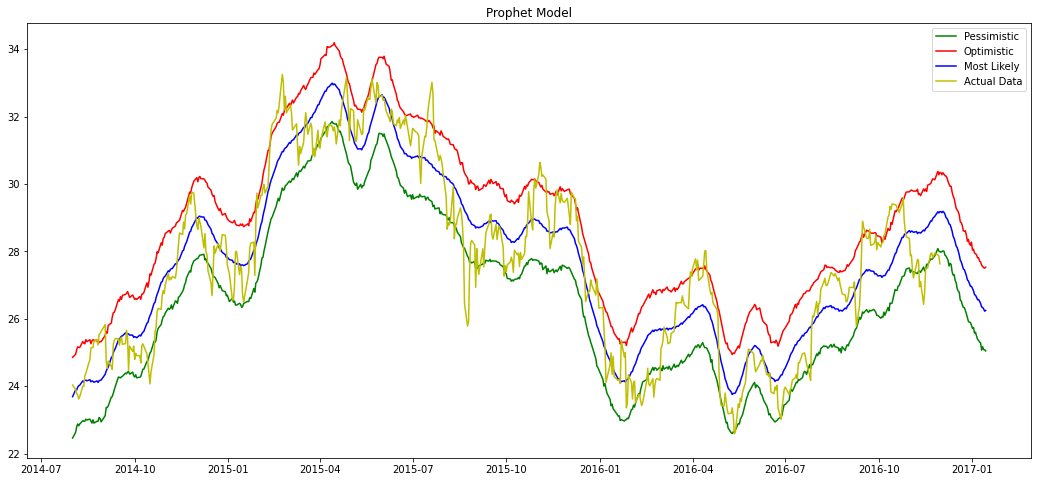

In [45]:
#Visualizing the results
plt.figure(figsize=(18,8))
plt.plot(prediction_prophet['ds'],prediction_prophet['yhat_lower'],color='g',label='Pessimistic')
plt.plot(prediction_prophet['ds'],prediction_prophet['yhat_upper'],color='r',label='Optimistic')
plt.plot(prediction_prophet['ds'],prediction_prophet['yhat'],color='b',label='Most Likely')
plt.plot(data_prophet['ds'],data_prophet['y'],color='y',label='Actual Data')
plt.legend()
plt.title('Prophet Model')
plt.show()

## LSTM MODEL

In [46]:
# Imporint Libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [47]:
df_lstm=df['Close']
date = (df.index)
scaler=MinMaxScaler(feature_range=(0,1))
df_lstm=scaler.fit_transform(np.array(df_lstm).reshape(-1,1))

In [48]:
# Train-Test Split
training_size = int(0.8*len(df_lstm))
test_size = len(df_lstm)-training_size
train_data = df_lstm[0:training_size]
test_data = df_lstm[training_size:len(df_lstm)] 

In [49]:
data = df['Close'].dropna().to_numpy()

In [50]:
def create_dataset(data, steps=1):
	dataX, dataY = [], []
	for i in range(len(data)-steps-1):
		a = data[i:(i+steps), 0]   
		dataX.append(a)
		dataY.append(data[i + steps, 0]) 
	return np.array(dataX), np.array(dataY)

In [51]:
# Reshaping
steps = 5
X_train, y_train = create_dataset(train_data, steps)
X_test, ytest = create_dataset(test_data, steps)
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [52]:
# Fitting Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Prediction
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [54]:
# Inverse Transform
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)
Y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(ytest.reshape(-1, 1))

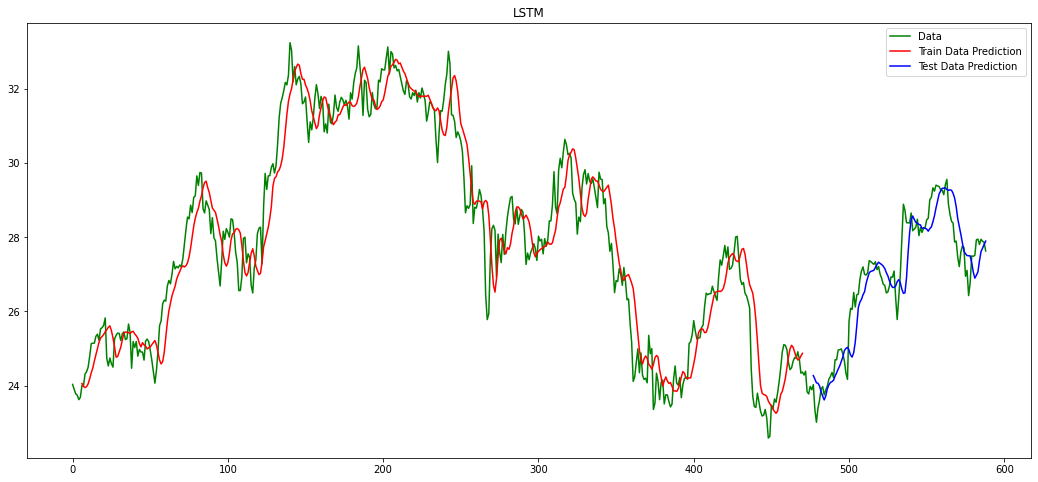

In [55]:
# Visulaize Predictions
pre=5
plt.figure(figsize=(18,8))
plt.plot(date,scaler.inverse_transform(df_lstm), label='Data', color='g')
plt.plot(date[pre+1:training_size],train_pred, label='Train Data Prediction', color='red')
plt.plot(date[training_size+pre+1:],test_pred, label='Test Data Prediction', color='b')
plt.legend()
plt.title('LSTM')
plt.show()

In [56]:
# Train data RMSE
rmse_lstm_train = np.sqrt(np.mean(np.power((np.array(Y_train)-np.array(train_pred)),2)))
print('RMSE Value of train data with LSTM model: ',rmse_lstm_train)

RMSE Value of train data with LSTM model:  0.6999005027114875


In [57]:
# Test Data RMSE
rmse_lstm_test = np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(test_pred)),2)))
print('RMSE Value of test data with LSTM model: ',rmse_lstm_test)

RMSE Value of test data with LSTM model:  0.5776526791578761


## VECTOR AUTO REGRESSION(VAR) MODEL

Differenced data:
       High       Low      Open     Close
1 -0.010000  0.090000  0.367500 -0.135000
2 -0.225000 -0.202499 -0.252501 -0.117498
3 -0.049999  0.087500 -0.152500 -0.040001
4  0.117498 -0.152500  0.045000 -0.119999
5 -0.282499 -0.205000 -0.167500  0.064999


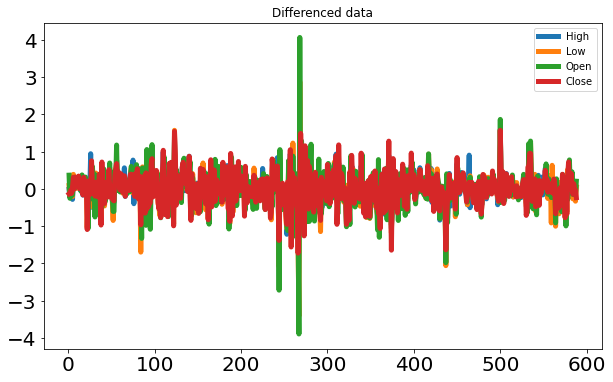

In [58]:
# From ADF and KPSS test in the beginning we know that our dataset is NON-STATIONARY
# differenced train data
data_diff = df1.iloc[:,1:5].diff()
data_diff.dropna(inplace=True)
print('Differenced data:')
print(data_diff.head())
# plotting differenced data
data_diff.plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.title('Differenced data')
plt.show()

In [59]:
#VAR Model
from statsmodels.tsa.api import VAR
var_model = VAR(data_diff)
res = var_model.select_order(maxlags=15)
print(res.summary())
results = var_model.fit(maxlags=15, ic='aic')
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -9.736      -9.706   5.909e-05      -9.725
1       -10.83      -10.68   1.980e-05      -10.77
2       -11.30      -11.02   1.243e-05      -11.19
3       -11.47     -11.07*   1.044e-05      -11.32
4       -11.57      -11.06   9.405e-06     -11.37*
5       -11.62      -10.98   8.986e-06      -11.37
6       -11.66      -10.90   8.603e-06      -11.37
7       -11.69      -10.80   8.416e-06      -11.34
8       -11.67      -10.67   8.545e-06      -11.28
9       -11.71      -10.58   8.257e-06      -11.27
10      -11.70      -10.46   8.275e-06      -11.22
11      -11.71      -10.35   8.190e-06      -11.18
12     -11.74*      -10.25  7.958e-06*      -11.16
13      -11.74      -10.13   7.989e-06      -11.11
14      -11.72      -9.991   8.132e-06      -11.05
15      -11.74      -9.883   8.031e-06      -11.01
-------------------------------

In [60]:
# Future predictions
pred = results.forecast(results.y, steps=40)
pred = pd.DataFrame(pred)
pred.columns =['High_pred','Low_pred','Open_pred','Close_pred']
pred

,High_pred,Low_pred,Open_pred,Close_pred
0,-0.013096,-0.061772,-0.248473,0.343143
1,0.198685,0.265360,0.390373,0.056125
2,-0.060106,-0.079726,-0.146303,-0.062506
3,0.092950,0.055375,-0.045061,0.170177
4,0.032680,0.177631,0.263601,0.001338
5,-0.004159,0.024802,0.013791,0.016711
6,0.021128,-0.071166,-0.131223,0.035450
7,0.037382,0.126166,0.189751,0.008573
8,0.030298,-0.043112,-0.067341,0.045676
9,-0.018659,-0.013468,0.040737,-0.104945


In [61]:
#Invert transform data to original shape
def invert_transformation(data_diff, pred):
  forecast = pred.copy()
  columns = df1.iloc[:,1:5].columns
  for col in columns:
    forecast[str(col)+'_pred'] = df1.iloc[:,1:5][col].iloc[-1] +   forecast[str(col) +'_pred'].cumsum()
  return forecast
output = invert_transformation(data_diff, pred)
output = pd.DataFrame(output['Close_pred'])
output

,Close_pred
0,27.973142
1,28.029267
2,27.966761
3,28.136938
4,28.138276
5,28.154987
6,28.190437
7,28.199010
8,28.244686
9,28.139741


Above are the future 40 Days prediction

In [62]:
#Assigning Future Dates to Future Prediction
d = df1.tail(40)
d.reset_index(inplace = True)
d = d.append(pd.DataFrame({'Date': pd.date_range(start = d.Date.iloc[-1], periods = (len(d)+1), freq = 'd', closed = 'right')}))
d.set_index('Date', inplace = True)
d = d.tail(40)
output.index = d.index

In [63]:
x= df1['Close'].to_list()+output['Close_pred'].to_list()

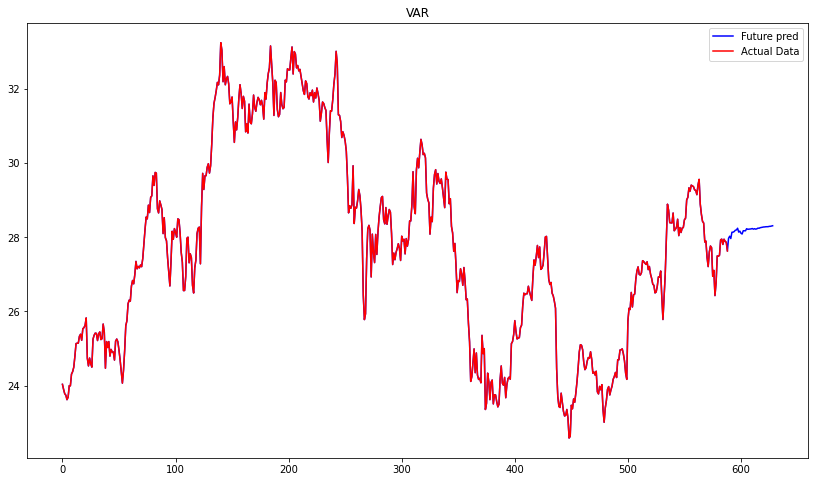

In [64]:
# Visualisation
plt.figure(figsize=(14,8))
plt.plot(x,label='Future pred',color='b')
plt.plot(df1['Close'].to_list(),label='Actual Data',color='red')
plt.legend()
plt.title('VAR')
plt.show()

---

---

---

**From above Models it is clear that ARIMA Model gives the best fit model.**


**Also Double Exponential and Triple Exponential models fits well to the dataset.**


**However, there are other advantages with other models.**


**Like Prophet model gives a range of interval as prediction i.e we get an optimistic, pessimistic and a most likely value. This could help us predict a range for the future for better estimation.**


**Also, for LSTM model we got a higher value of RMSE for train and test data, but if we optimise the parameters or introduce additional neurons or maybe hidden layers there is a scope of huge improvement. Also the error can be reduced if we have more datset to train weights of neurons effectively.**
